In [20]:
# 



In [1]:
import os

directory = f'/Users/lilimatic/greenspace'
os.chdir(directory)

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.utils.class_weight import compute_sample_weight

#AUC and ROC curve 
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, confusion_matrix

import shap

In [2]:
from functions.ml_data import *

df_copy = df.copy()

In [26]:
sum(abs(df.physicalsafety - df.covidsafety))

82

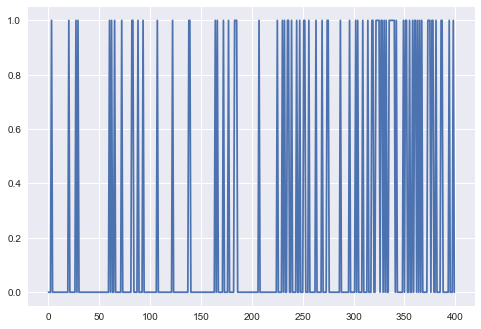

In [25]:
plt.plot(abs(df.physicalsafety - df.covidsafety))

In [28]:
safety = df.physicalsafety

In [35]:
df[df.physicalsafety != df.covidsafety].index

Int64Index([  3,  20,  27,  29,  60,  62,  65,  72,  82,  83,  88,  93, 107,
            122, 138, 139, 164, 166, 172, 177, 183, 184, 185, 207, 225, 230,
            232, 235, 236, 239, 244, 247, 251, 252, 256, 263, 269, 274, 275,
            287, 296, 302, 304, 309, 314, 318, 319, 322, 323, 324, 325, 327,
            328, 330, 332, 335, 336, 337, 338, 339, 340, 342, 349, 351, 352,
            355, 358, 360, 361, 363, 365, 367, 373, 374, 375, 377, 378, 381,
            386, 387, 394, 398],
           dtype='int64')

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [41]:
df.safety

0      1
1      1
2      1
3      1
4      0
      ..
395    0
396    1
397    1
398    0
399    1
Name: physicalsafety, Length: 400, dtype: int64

In [4]:
y = 'physicalsafety'

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_copy.loc[:, df_copy.columns != y], \
                                                    df_copy[y], test_size=0.3)

In [6]:
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train #provide your own target name
)


In [7]:
model = XGBClassifier(n_estimators=5, max_depth=5, learning_rate=1e-4, objective='binary:logistic')

log_reg = LogisticRegression()

#Model fit 
model.fit(X_train, y_train)

log_reg.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression()

In [8]:
pred_prob1 = model.predict_proba(X_test)
pred_prob2 = log_reg.predict_proba(X_test)

In [9]:
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

In [10]:
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [11]:
# auc scores

auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.7554226918798665 0.7705784204671856


In [12]:
# matplotlib
plt.style.use('seaborn')

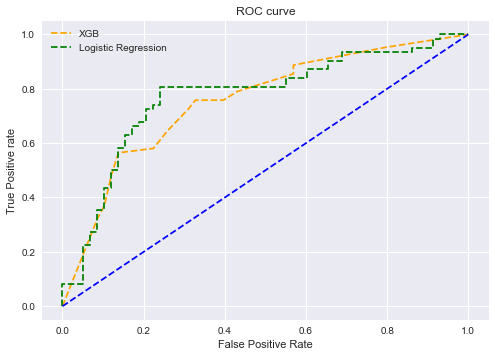

In [13]:
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='XGB')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [14]:
log_reg.intercept_

log_reg.coef_

array([[ 0.01856676, -0.19244409,  0.38843172, -0.14693089, -0.00285558,
        -0.07003301,  0.24014925,  2.54893568, -0.52977079,  0.08958195,
         0.00772817, -0.03042373,  0.15881908,  0.20533926,  0.08906478,
         0.20016254,  0.23238518, -0.02171039,  0.08506661,  0.96908954,
        -0.40891923, -0.08300517,  0.36088938,  0.26322621, -0.61185674,
        -0.41662614, -0.07378457, -0.00926945, -0.08141385, -0.22099013,
        -0.02068709, -0.11437823]])

In [15]:
X100 = shap.utils.sample(X_train, len(X_train))


In [16]:
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X_train)

PermutationExplainer explainer: 281it [00:10,  1.15it/s]                         


In [17]:
sample_ind = 20

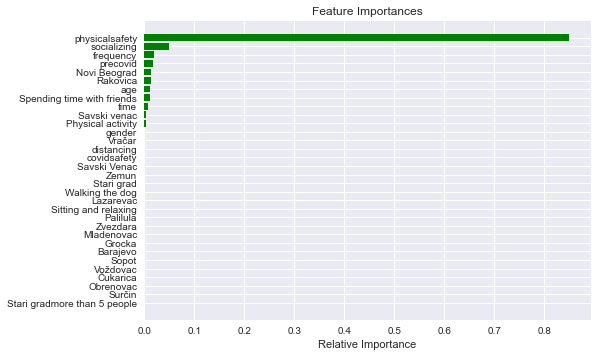

In [18]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = df.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [19]:
import statsmodels.api as sm 
log_reg = sm.Logit(df.loc[:, df.columns != y], df[y]).fit()

ValueError: endog must be in the unit interval.